# Projet d'Analyse de Donn√©es ‚Äî DatasetComp.xlsx

In [41]:

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8,5)
import pandas as pd
import numpy as np
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.svm               import SVR
from sklearn.tree              import DecisionTreeRegressor
from sklearn.ensemble          import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics           import mean_squared_error, r2_score

# ‚Äî 1) On part du DataFrame pivot cr√©√© pr√©c√©demment ‚Äî
# pivot = pd.read_excel(...).pivot_table(...)  # comme vu avant

# Pour rappel, pivot contient les colonnes :
# ['Region','RegAbbr','RegCode','Year','Rural','Total','Urban']

# ‚Äî 2) D√©finir X (features) et y (target) ‚Äî
# Ici, on choisit de pr√©dire "Total" (pourcentage global),
# et d'utiliser Year, RegCode, Rural et Urban comme pr√©dicteurs.
X = pivot[['Year', 'RegCode', 'Rural', 'Urban']]
y = pivot['Total']

# ‚Äî 3) Split train / test ‚Äî
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ‚Äî 4) Pr√©-processing des features num√©riques ‚Äî
num_features = ['Year', 'RegCode']
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), num_features)
], remainder='passthrough')  # laisse 'Rural' et 'Urban' intactes

# ‚Äî 5) D√©finition de nos mod√®les ‚Äî
models = {
    'SVR (RBF)' : SVR(kernel='rbf', C=10, gamma='scale'),
    'Tree'      : DecisionTreeRegressor(max_depth=5, random_state=42),
    'RF'        : RandomForestRegressor(n_estimators=100, random_state=42),
    'XGB'       : xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# ‚Äî 6) Entra√Ænement, pr√©diction et √©valuation ‚Äî
results = []
for name, model in models.items():
    pipe = Pipeline([
        ('prep',    preprocessor),
        ('model',   model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2   = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R¬≤': r2})

results_df = pd.DataFrame(results).set_index('Model')
print(results_df)



c:\Users\Adrien\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Adrien\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Adrien\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


           RMSE   R¬≤
Model               
SVR (RBF)  3.67 0.90
Tree       3.51 0.91
RF         2.54 0.95
XGB        2.99 0.93


c:\Users\Adrien\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [3]:

df = pd.read_csv('datasetComp.csv', sep=';')



# -------------------------------------------
# 3. Exploratory Data Analysis (EDA)
# ------------------------------------------

In [4]:
# V√©rification rapide de la structure
display("Dimensions :", df.shape)
display(df.dtypes)
display(df.head())

display(df.columns)

'Dimensions :'

(1848, 6)

Indicator      object
Year            int64
Region         object
Zone           object
Percentage     object
Real          float64
dtype: object

Indicator  Year  \
0  Population covered by a mobile-cellular networ...  2015   
1  Population covered by a mobile-cellular networ...  2015   
2  Population covered by a mobile-cellular networ...  2015   
3  Population covered by a mobile-cellular networ...  2015   
4  Population covered by a mobile-cellular networ...  2015   

                  Region   Zone Percentage  Real  
0                 World   Rural       88,9   NaN  
1            Low-income   Rural       67,1   NaN  
2   Lower-middle-income   Rural       90,1   NaN  
3   Upper-middle-income   Rural       91,2   NaN  
4           High-income   Rural       92,4   NaN

Index(['Indicator', 'Year', 'Region', 'Zone', 'Percentage', 'Real'], dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

Distribution des variables num√©riques:


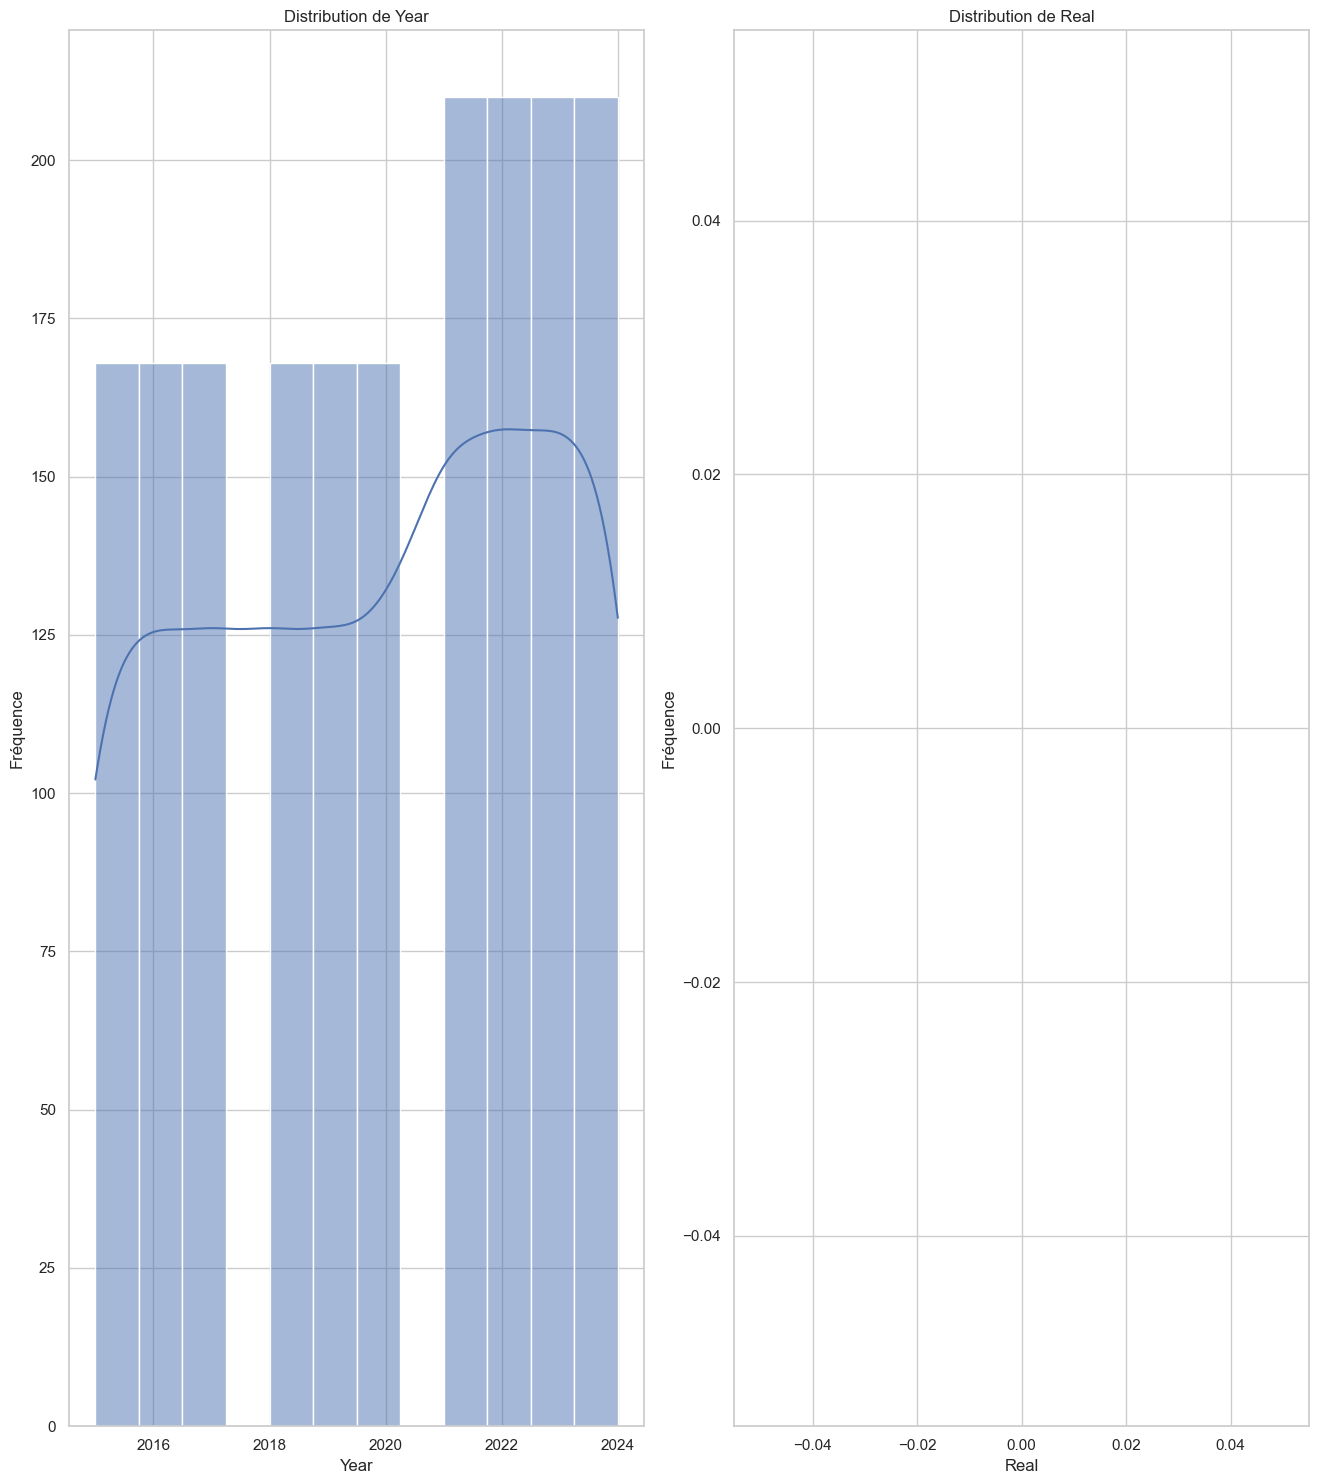

In [6]:
def plot_histograms(df, numerical_cols, n_cols=3, figsize=(20, 15)):
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution de {col}', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Fr√©quence')
    
    # Masquer les axes suppl√©mentaires si n√©cessaire
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Trac√© des histogrammes
print("Distribution des variables num√©riques:")
plot_histograms(df, numerical_cols)


In [7]:
def clean_numeric(value):
    if isinstance(value, str):
        return float(value.replace(',', '.'))
    return value


# Affichage des premi√®res lignes pour v√©rification
print("Aper√ßu des donn√©es :")
display(df.head())

# ### 2.2 Analyse pr√©liminaire des donn√©es

# Informations g√©n√©rales sur le dataset
print("\nInformations sur le dataset :")
display(df.info())

# Description statistique des donn√©es num√©riques
print("\nStatistiques descriptives :")
display(df.describe())



Aper√ßu des donn√©es :


Indicator  Year  \
0  Population covered by a mobile-cellular networ...  2015   
1  Population covered by a mobile-cellular networ...  2015   
2  Population covered by a mobile-cellular networ...  2015   
3  Population covered by a mobile-cellular networ...  2015   
4  Population covered by a mobile-cellular networ...  2015   

                  Region   Zone Percentage  Real  
0                 World   Rural       88,9   NaN  
1            Low-income   Rural       67,1   NaN  
2   Lower-middle-income   Rural       90,1   NaN  
3   Upper-middle-income   Rural       91,2   NaN  
4           High-income   Rural       92,4   NaN


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Indicator   1848 non-null   object 
 1   Year        1848 non-null   int64  
 2   Region      1848 non-null   object 
 3   Zone        1848 non-null   object 
 4   Percentage  1848 non-null   object 
 5   Real        0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 86.8+ KB


None


Statistiques descriptives :


Year  Real
count 1848.00  0.00
mean  2019.77   NaN
std      2.89   NaN
min   2015.00   NaN
25%   2017.00   NaN
50%   2020.00   NaN
75%   2022.00   NaN
max   2024.00   NaN

In [8]:
def clean_numeric(value):
	if isinstance(value, str):
		value = value.strip()
		if value.lower() in ['n/a', 'na', ' n/a ']:
			return np.nan
		try:
			return float(value.replace(',', '.'))
		except ValueError:
			return np.nan
	return value

df['Percentage'] = df['Percentage'].apply(clean_numeric)

In [9]:
display(df['Percentage'].head())
print("\nValeurs manquantes par colonne :")
display(df.isnull().sum())
# 2. Valeurs manquantes
print(f"Pourcentage de NA : {round(df.isna().sum().sum() / df.size * 100, 1)}%")

0   88.90
1   67.10
2   90.10
3   91.20
4   92.40
Name: Percentage, dtype: float64


Valeurs manquantes par colonne :


Indicator        0
Year             0
Region           0
Zone             0
Percentage     241
Real          1848
dtype: int64

Pourcentage de NA : 18.8%


In [10]:
# doublons
print(f"Doublons : {df.duplicated().sum()}")

Doublons : 0


In [11]:
# 2.3 Traitement des valeurs manquantes dans la colonne 'Percentage'

# V√©rification des valeurs manquantes avant le remplacement
null_values_before = df.isnull().sum()
n_missing_before = df['Percentage'].isnull().sum()
print(f"Nombre de valeurs manquantes dans 'Percentage' avant traitement: {n_missing_before}")

# Calcul des moyennes par Indicateur et Ann√©e
indicator_year_means = df.groupby(['Indicator', 'Year'])['Percentage'].transform('mean')



Nombre de valeurs manquantes dans 'Percentage' avant traitement: 241


In [12]:
# Remplacement des valeurs manquantes par la moyenne de l'indicateur et de l'ann√©e correspondante
df['Percentage'].fillna(indicator_year_means, inplace=True)

# Si des valeurs restent manquantes (ex: si l'indicateur entier pour une ann√©e n'a pas de valeur),
# les remplacer par la moyenne globale
mean_value = df['Percentage'].mean()
df['Percentage'].fillna(mean_value, inplace=True)

# V√©rification apr√®s remplacement
null_values_after = df.isnull().sum()
n_missing_after = df['Percentage'].isnull().sum()
print(f"Nombre de valeurs manquantes dans 'Percentage' apr√®s traitement: {n_missing_after}")
print(f"Moyenne globale utilis√©e pour les remplacements restants: {mean_value:.2f}")

# tableau pivot pour visualiser les donn√©es par r√©gion, zone et indicateur
pivot_df = df.pivot_table(index=['Region', 'Zone', 'Indicator'], 
                         columns='Year', 
                         values='Percentage')

# aper√ßu du tableau pivot
print("\nTableau pivot des pourcentages par r√©gion, zone et indicateur:")
display(pivot_df.head())



Nombre de valeurs manquantes dans 'Percentage' apr√®s traitement: 0
Moyenne globale utilis√©e pour les remplacements restants: 72.78

Tableau pivot des pourcentages par r√©gion, zone et indicateur:


C:\Users\Adrien\AppData\Local\Temp\ipykernel_10264\1355934818.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Percentage'].fillna(indicator_year_means, inplace=True)
C:\Users\Adrien\AppData\Local\Temp\ipykernel_10264\1355934818.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

Year                                                                2015  \
Region    Zone  Indicator                                                  
Africa    Rural Population covered by at least a 3G mobile netw... 29.70   
          Total Population covered by at least a 3G mobile netw... 49.60   
          Urban Population covered by at least a 3G mobile netw... 86.10   
Americas  Rural Population covered by at least a 3G mobile netw... 65.10   
          Total Population covered by at least a 3G mobile netw... 91.40   

Year                                                                2016  \
Region    Zone  Indicator                                                  
Africa    Rural Population covered by at least a 3G mobile netw... 37.40   
          Total Population covered by at least a 3G mobile netw... 57.50   
          Urban Population covered by at least a 3G mobile netw... 92.80   
Americas  Rural Population covered by at least a 3G mobile netw... 69.50   
          Total Population covered by at least a 3G mobile netw... 92.80   

Year                                                                2017  \
Region    Zone  Indicator                                                  
Africa    Rural Population covered by at least a 3G mobile netw... 42.00   
          Total Population covered by at least a 3G mobile netw... 62.60   
          Urban Population covered by at least a 3G mobile netw... 94.10   
Americas  Rural Population covered by at least a 3G mobile netw... 72.00   
          Total Population covered by at least a 3G mobile netw... 94.00   

Year                                                                2018  \
Region    Zone  Indicator                                                  
Africa    Rural Population covered by at least a 3G mobile netw... 53.10   
          Total Population covered by at least a 3G mobile netw... 70.30   
          Urban Population covered by at least a 3G mobile netw... 95.60   
Americas  Rural Population covered by at least a 3G mobile netw... 72.50   
          Total Population covered by at least a 3G mobile netw... 94.70   

Year                                                                2019  \
Region    Zone  Indicator                                                  
Africa    Rural Population covered by at least a 3G mobile netw... 59.10   
          Total Population covered by at least a 3G mobile netw... 73.70   
          Urban Population covered by at least a 3G mobile netw... 96.90   
Americas  Rural Population covered by at least a 3G mobile netw... 73.00   
          Total Population covered by at least a 3G mobile netw... 94.50   

Year                                                                2020  \
Region    Zone  Indicator                                                  
Africa    Rural Population covered by at least a 3G mobile netw... 59.20   
          Total Population covered by at least a 3G mobile netw... 75.90   
          Urban Population covered by at least a 3G mobile netw... 99.40   
Americas  Rural Population covered by at least a 3G mobile netw... 72.20   
          Total Population covered by at least a 3G mobile netw... 94.60   

Year                                                                2021  \
Region    Zone  Indicator                                                  
Africa    Rural Population covered by at least a 3G mobile netw... 64.20   
          Total Population covered by at least a 3G mobile netw... 79.10   
          Urban Population covered by at least a 3G mobile netw... 99.80   
Americas  Rural Population covered by at least a 3G mobile netw... 72.20   
          Total Population covered by at least a 3G mobile netw... 94.70   

Year                                                                2022  \
Region    Zone  Indicator                                                  
Africa    Rural Population covered by at least a 3G mobile netw... 68.50   
          Total Population covered by at 

In [13]:
# les valeurs uniques de la colonne "Indicator" pour etre sur de tout avoir
print("Valeurs uniques dans la colonne Indicator:")
display(df['Indicator'].unique())

# Pour pour voir aussi le nombre d'occurrences de chaque valeur
print("\nR√©partition des valeurs dans Indicator:")
display(df['Indicator'].value_counts())

# Pour conna√Ætre simplement le nombre de valeurs uniques
print(f"\nNombre de valeurs uniques dans Indicator: {df['Indicator'].nunique()}")

Valeurs uniques dans la colonne Indicator:


array(['Population covered by a mobile-cellular network (%)',
       'Population covered by at least a 3G mobile network (%)',
       'Population covered by at least an LTE/WiMAX mobile network',
       'Population covered by at least a 5G mobile network (%)',
       'Percentage of individuals using the Internet, by urban/rural area'],
      dtype=object)


R√©partition des valeurs dans Indicator:


Indicator
Population covered by a mobile-cellular network (%)                  420
Population covered by at least a 3G mobile network (%)               420
Population covered by at least an LTE/WiMAX mobile network           420
Population covered by at least a 5G mobile network (%)               420
Percentage of individuals using the Internet, by urban/rural area    168
Name: count, dtype: int64


Nombre de valeurs uniques dans Indicator: 5


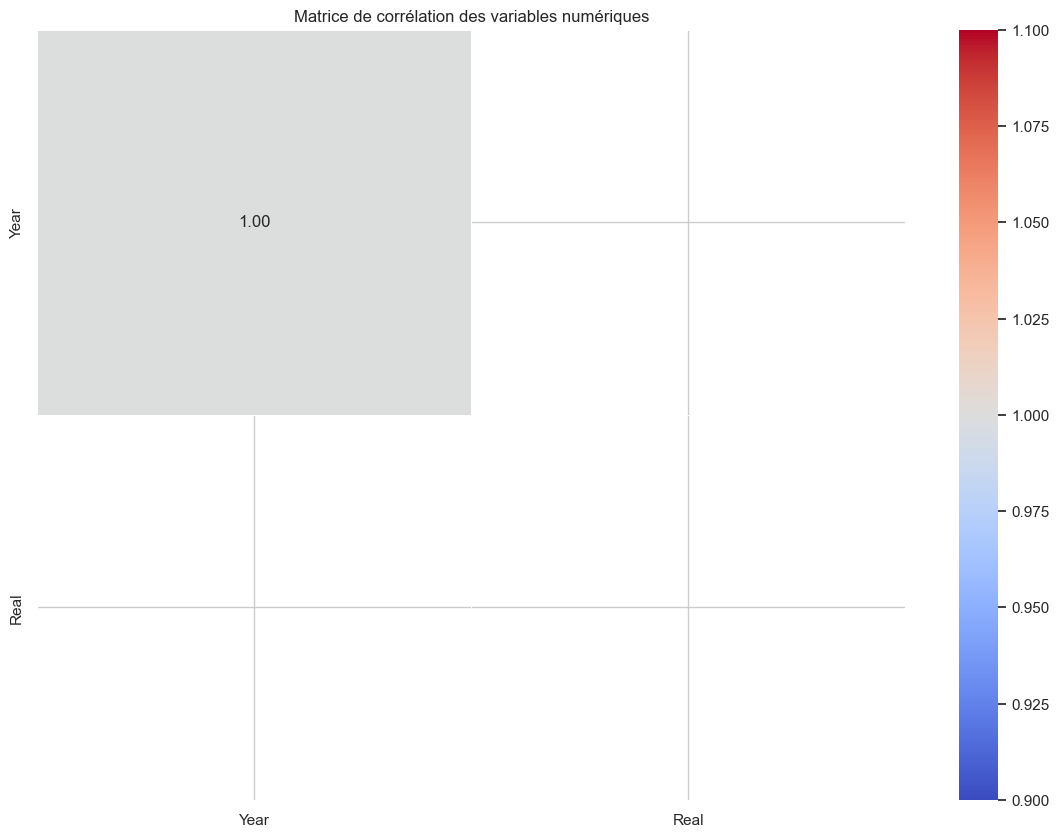

In [14]:
# Matrice de corr√©lation
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corr√©lation des variables num√©riques')
plt.show()

count   1848.00
mean      72.78
std       28.65
min        0.10
25%       61.60
50%       81.00
75%       96.60
max      100.00
Name: Percentage, dtype: float64


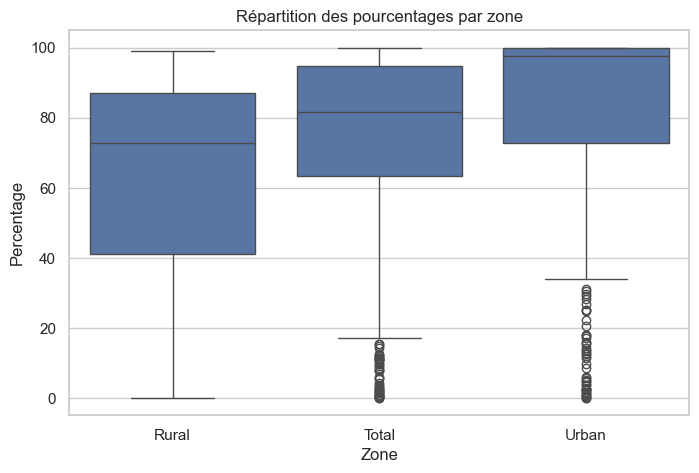

In [15]:
#Statistiques sur Percentage
print(df["Percentage"].describe())
sns.boxplot(x="Zone", y="Percentage", data=df)
plt.title("R√©partition des pourcentages par zone"); plt.show()

Analyse du boxplot
- Le boxplot montre la r√©partition des pourcentages par indicateur pour chaque zone.
- Les zones sont repr√©sent√©es sur l'axe des abscisses (x), et les pourcentages sur l'axe des ordonn√©es (y).

Points cl√©s √† observer :
1. M√©diane : La ligne √† l'int√©rieur de chaque bo√Æte repr√©sente la m√©diane des donn√©es pour cet indicateur dans la zone donn√©e.
2. Quartiles : Les limites de la bo√Æte repr√©sentent le premier quartile (Q1) et le troisi√®me quartile (Q3).
3. √âtendue interquartile (IQR) : La hauteur de la bo√Æte montre l'IQR, qui est Q3 - Q1.
4. Outliers : Les points situ√©s en dehors des "moustaches" (whiskers) sont des valeurs aberrantes.

 Interpr√©tation :
 - Une bo√Æte plus petite indique une faible variabilit√© des donn√©es pour cet indicateur dans la zone.
 - Une bo√Æte plus grande indique une plus grande variabilit√©.
 - Les outliers peuvent indiquer des valeurs extr√™mes ou des anomalies dans les donn√©es.
 - Comparer les bo√Ætes entre les zones permet d'identifier les diff√©rences dans la r√©partition des pourcentages pour chaque indicateur.

observation :
On conctate clairement que le pourcentage global de couverture mobile etc est plus √©lev√© pour la zone URBAN

**Cr√©ation des boxplots par zone et par indicateur**

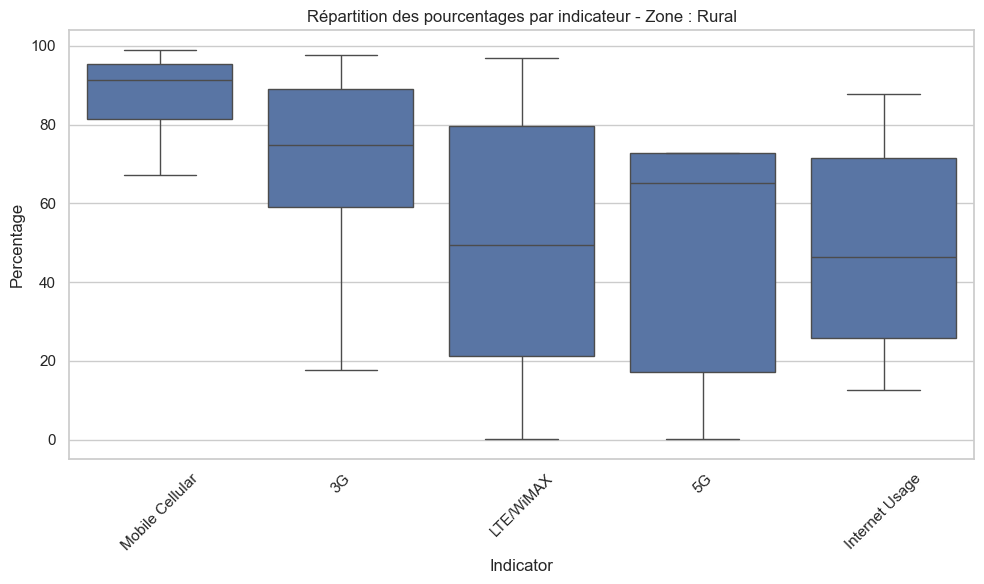

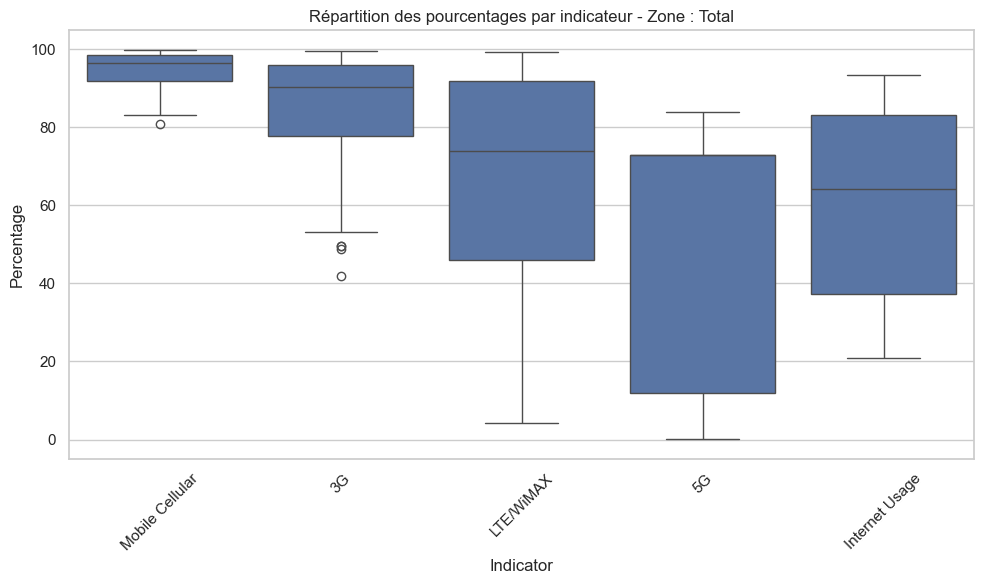

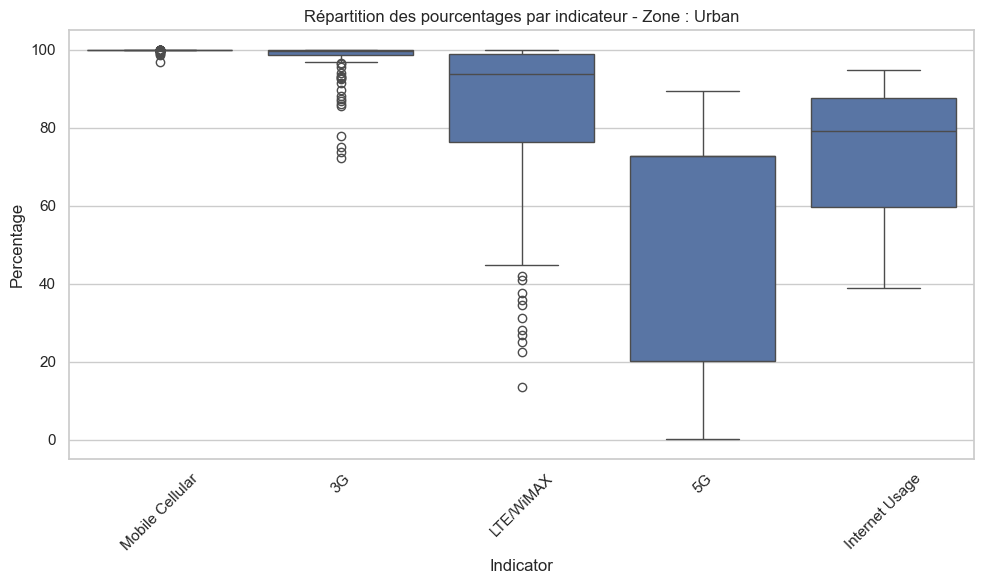

In [16]:
# renommage des indicateurs
renommage = {
    "Population covered by at least a 3G mobile network (%)": "3G",
    "Population covered by a mobile-cellular network (%)": "Mobile Cellular",
    "Population covered by at least an LTE/WiMAX mobile network": "LTE/WiMAX",
    "Percentage of individuals using the Internet, by urban/rural area": "Internet Usage",
    "Population covered by at least a 5G mobile network (%)": "5G"
}

df["Indicator"] = df["Indicator"].replace(renommage)

# boxplots par zone et par indicateur
zones = df["Zone"].unique()
for zone in zones:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df[df["Zone"] == zone],
        x="Indicator",
        y="Percentage"
    )
    plt.title(f"R√©partition des pourcentages par indicateur - Zone : {zone}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**On va donc supprimer les valeurs aberrantes**


=== Traitement des outliers pour le pourcentage ===
Traitement des outliers pour 15 groupes (combinaisons de Zone et Indicator)...

Statistiques des outliers par groupe:


Zone        Indicator  Outliers Count  Outliers Percentage
2  Urban  Mobile Cellular              31                22.14
4  Urban               3G              19                13.57
7  Urban        LTE/WiMAX              11                 7.86
3  Total               3G               4                 2.86
1  Total  Mobile Cellular               1                 0.71
0  Rural  Mobile Cellular               0                 0.00
5  Rural               3G               0                 0.00
6  Total        LTE/WiMAX               0                 0.00
8  Rural        LTE/WiMAX               0                 0.00
9  Rural               5G               0                 0.00

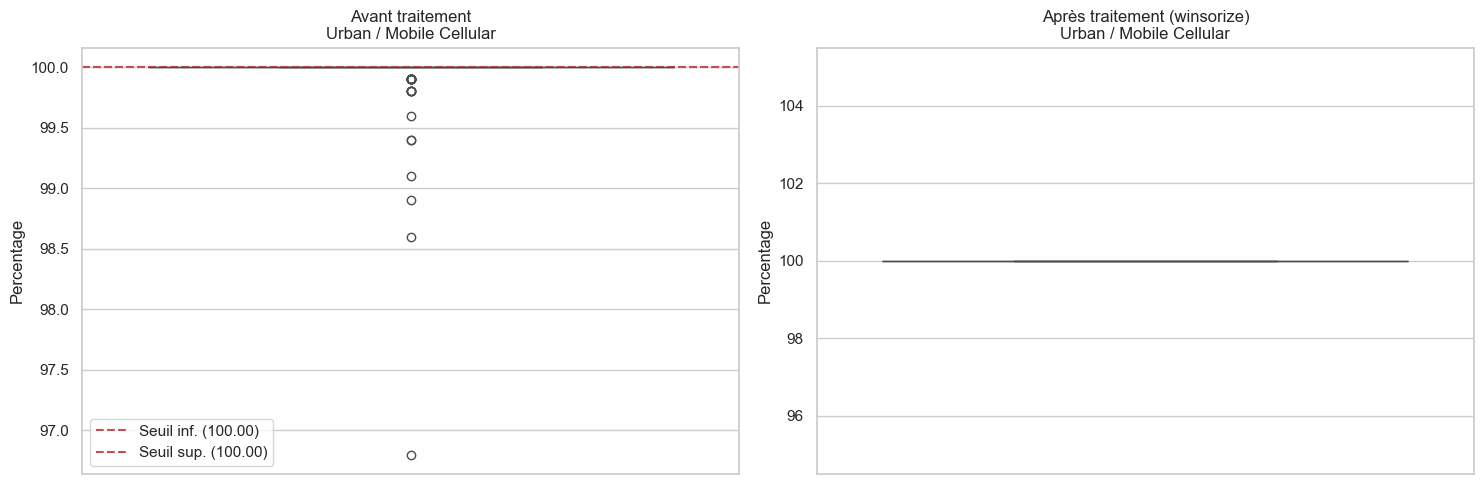

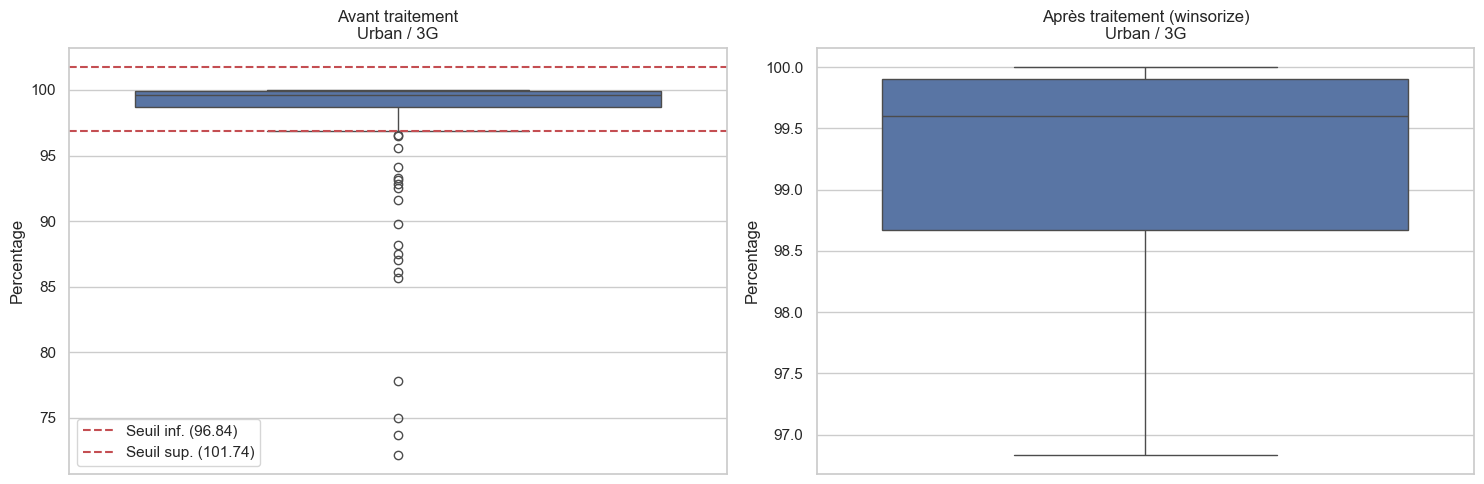

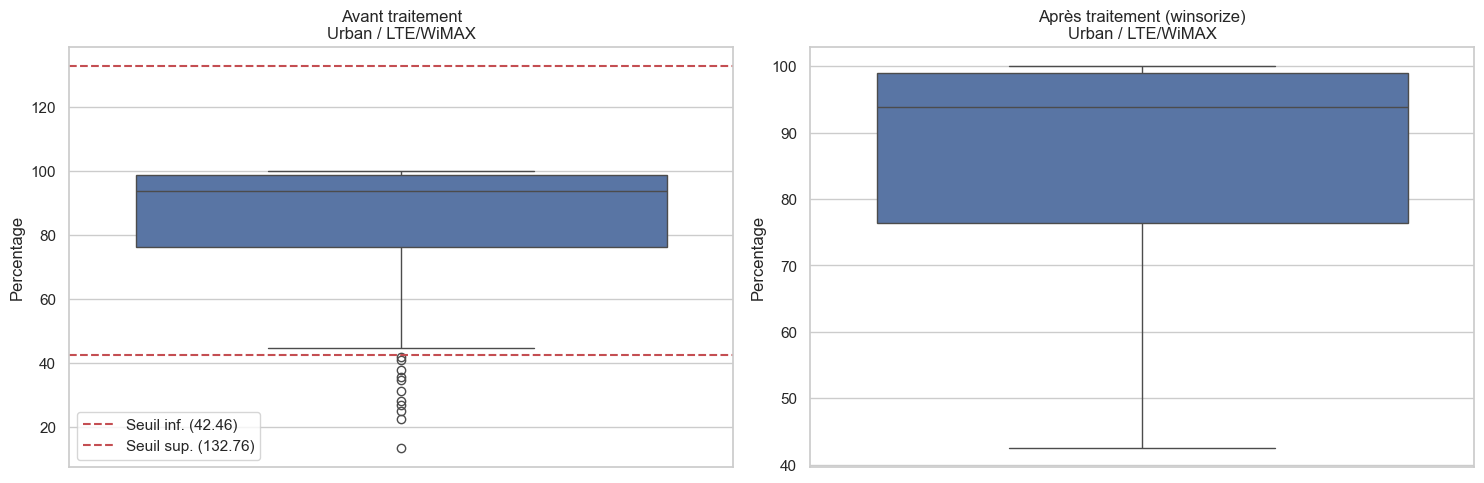

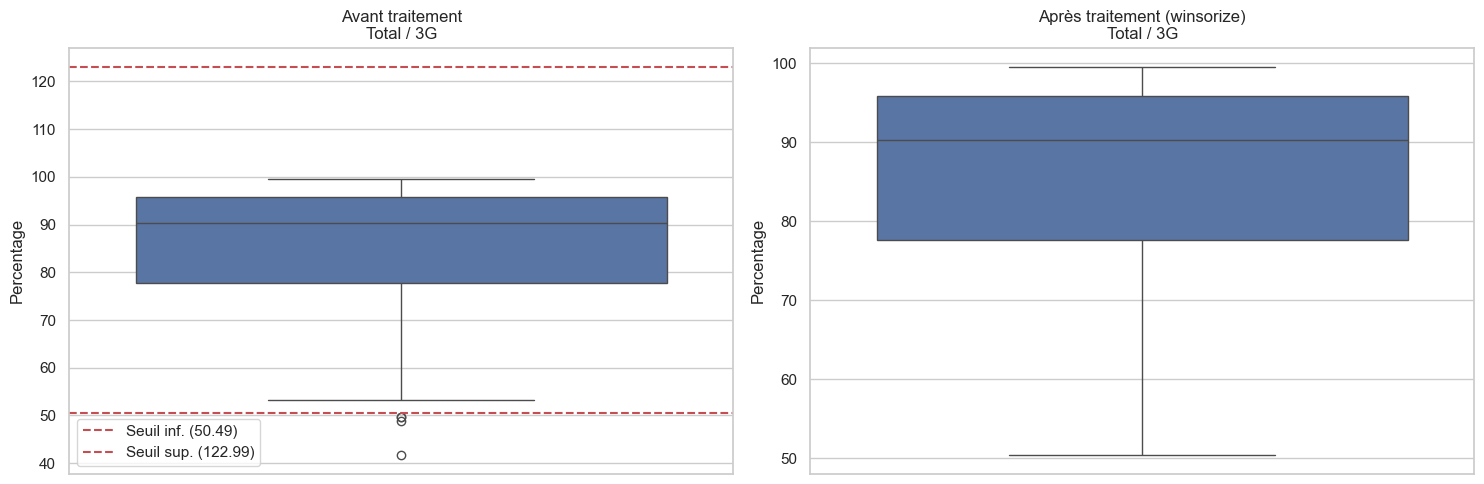

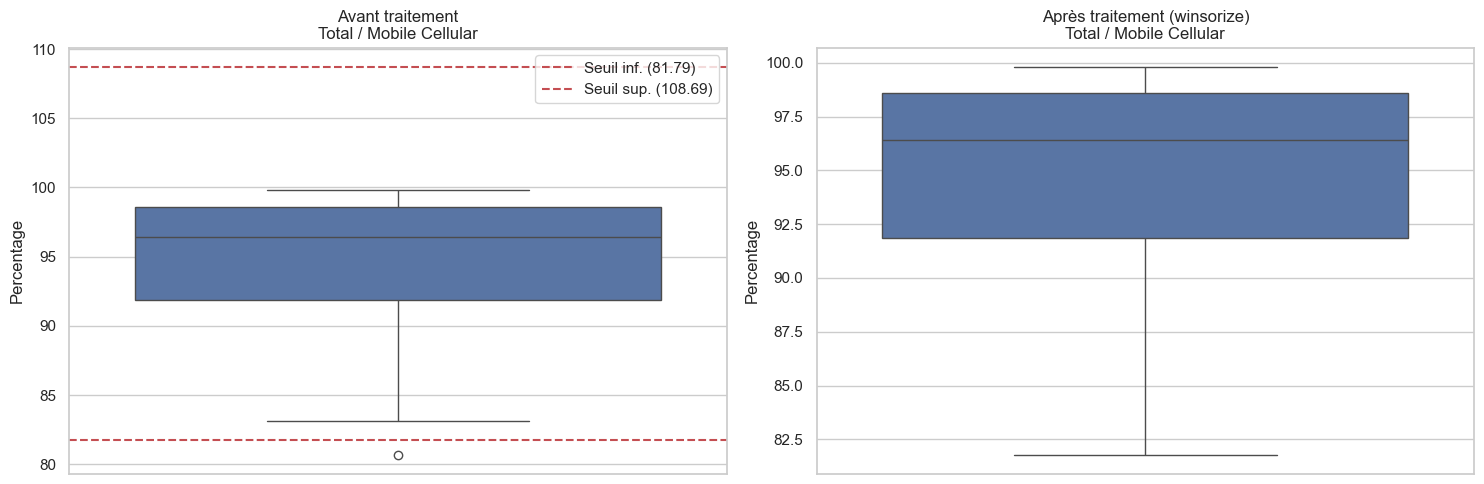

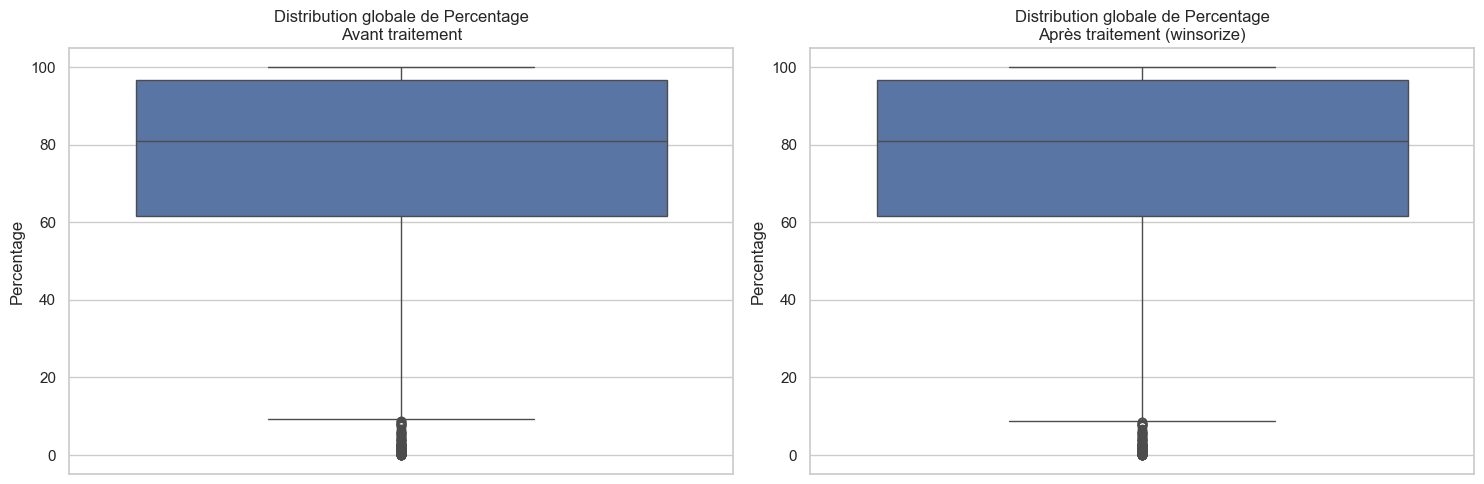

C:\Users\Adrien\AppData\Local\Temp\ipykernel_10264\3589194590.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Adrien\AppData\Local\Temp\ipykernel_10264\3589194590.py:187: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')


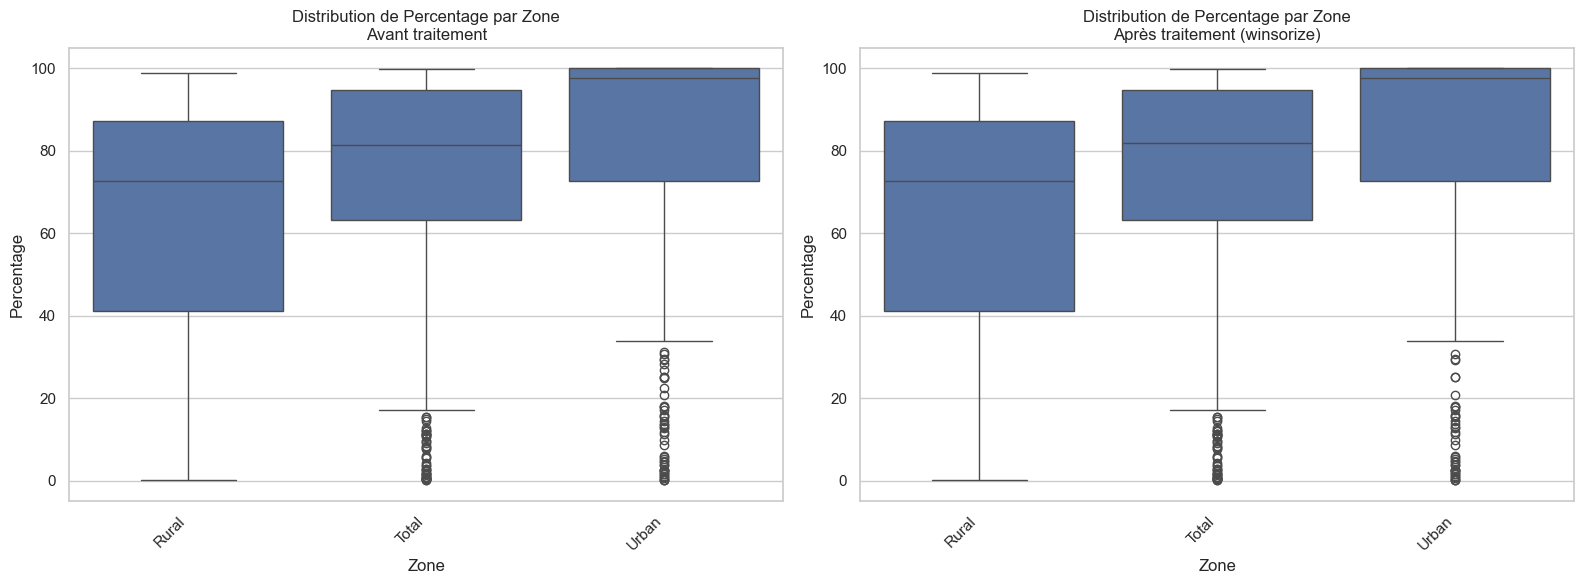


R√©sum√© de l'impact du traitement des outliers (winsorize):
- Nombre total d'outliers identifi√©s: 66
- Nombre de valeurs remplac√©es par les bornes: 66

Statistiques descriptives avant traitement:


count   1848.00
mean      72.78
std       28.65
min        0.10
25%       61.60
50%       81.00
75%       96.60
max      100.00
Name: Percentage, dtype: float64


Statistiques descriptives apr√®s traitement:


count   1848.00
mean      72.96
std       28.61
min        0.10
25%       61.60
50%       81.05
75%       96.84
max      100.00
Name: Percentage, dtype: float64

In [ ]:
def handle_and_visualize_outliers(df, percentage_col, zone_col='ZONE', indicator_col='INDICATOR', 
                                method='winsorize', threshold=1.5, max_groups_display=6):
    """
    D√©tecte, traite et visualise les valeurs aberrantes s√©par√©ment pour chaque combinaison 
    de zone et d'indicateur.
    
    Param√®tres:
    -----------
    df : DataFrame
        Le DataFrame contenant les donn√©es
    percentage_col : str
        Nom de la colonne contenant les valeurs en pourcentage √† analyser
    zone_col : str
        Nom de la colonne contenant les diff√©rentes zones
    indicator_col : str
        Nom de la colonne contenant les diff√©rents indicateurs
    method : str, {'winsorize', 'remove', 'replace_nan'}
        M√©thode de traitement des outliers
    threshold : float
        Facteur multiplicatif pour l'IQR pour d√©finir les bornes
    max_groups_display : int
        Nombre maximum de groupes √† afficher dans les visualisations
        
    Returns:
    --------
    DataFrame: Le DataFrame avec les outliers trait√©s
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib.gridspec import GridSpec
    
    df_clean = df.copy()
    
    # Liste pour stocker les indices des lignes √† supprimer si method=='remove'
    indices_to_drop = []
    
    # Dictionnaire pour stocker les statistiques sur les outliers
    outliers_stats = {}
    
    # R√©cup√©rer toutes les combinaisons uniques de zone et d'indicateur
    groups = df[[zone_col, indicator_col]].drop_duplicates()
    
    print(f"Traitement des outliers pour {len(groups)} groupes (combinaisons de {zone_col} et {indicator_col})...")
    
    # Pour chaque combinaison, d√©tecter et traiter les outliers
    for _, group in groups.iterrows():
        zone = group[zone_col]
        indicator = group[indicator_col]
        
        # Cr√©er un masque pour filtrer les donn√©es du groupe
        mask = (df[zone_col] == zone) & (df[indicator_col] == indicator)
        
        # Obtenir les valeurs pour ce groupe
        values = df.loc[mask, percentage_col]
        
        # Si moins de 4 points de donn√©es, on ne peut pas d√©tecter d'outliers significativement
        if len(values) < 4:
            outliers_stats[(zone, indicator)] = {'count': 0, 'percentage': 0}
            continue
        
        # Calcul des statistiques pour ce groupe
        Q1 = values.quantile(0.25)
        Q3 = values.quantile(0.75)
        IQR = Q3 - Q1
        
        # D√©finir les bornes pour les outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Identifier les outliers pour ce groupe
        outliers_mask = (values < lower_bound) | (values > upper_bound)
        outliers_indices = values[outliers_mask].index
        outliers_count = len(outliers_indices)
        outliers_percentage = (outliers_count / len(values)) * 100 if len(values) > 0 else 0
        
        # Stocker les statistiques
        outliers_stats[(zone, indicator)] = {
            'count': outliers_count,
            'percentage': outliers_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        
        if outliers_count > 0:
            if method == 'winsorize':
                # Remplacer les outliers par les bornes
                df_clean.loc[outliers_indices[values[outliers_indices] < lower_bound], percentage_col] = lower_bound
                df_clean.loc[outliers_indices[values[outliers_indices] > upper_bound], percentage_col] = upper_bound
                
            elif method == 'remove':
                # Stocker les indices pour suppression
                indices_to_drop.extend(outliers_indices)
                
            elif method == 'replace_nan':
                # Remplacer par NaN
                df_clean.loc[outliers_indices, percentage_col] = np.nan
    
    # Si la m√©thode est 'remove', supprimer toutes les lignes identifi√©es
    if method == 'remove':
        df_clean = df_clean.drop(indices_to_drop)
        print(f"  Total: {len(indices_to_drop)} lignes avec outliers supprim√©es.")
    
    # Convertir les statistiques en DataFrame pour faciliter l'affichage
    stats_df = pd.DataFrame([
        {
            'Zone': zone,
            'Indicator': indicator,
            'Outliers Count': stats['count'],
            'Outliers Percentage': stats['percentage']
        }
        for (zone, indicator), stats in outliers_stats.items()
    ])
    
    # Trier par nombre d'outliers (ordre d√©croissant)
    stats_df = stats_df.sort_values('Outliers Count', ascending=False)
    
    print("\nStatistiques des outliers par groupe:")
    display(stats_df.head(10))  # Afficher les 10 premiers groupes avec le plus d'outliers
    
    # S√©lectionner les groupes avec le plus d'outliers pour visualisation
    top_groups = stats_df.head(max_groups_display)
    
    # Visualiser les boxplots avant et apr√®s traitement pour les groupes s√©lectionn√©s
    for idx, row in top_groups.iterrows():
        zone = row['Zone']
        indicator = row['Indicator']
        
        if row['Outliers Count'] == 0:
            continue  # Skip groups without outliers
            
        # Filtrer les donn√©es pour ce groupe
        mask_before = (df[zone_col] == zone) & (df[indicator_col] == indicator)
        mask_after = (df_clean[zone_col] == zone) & (df_clean[indicator_col] == indicator)
        
        # Cr√©er un subplot avec deux boxplots c√¥te √† c√¥te
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        
        # Boxplot avant traitement
        sns.boxplot(y=df.loc[mask_before, percentage_col], ax=ax[0])
        ax[0].set_title(f'Avant traitement\n{zone} / {indicator}')
        ax[0].set_ylabel(percentage_col)
        
        # Ajouter les limites des outliers
        if 'lower_bound' in outliers_stats[(zone, indicator)]:
            ax[0].axhline(y=outliers_stats[(zone, indicator)]['lower_bound'], color='r', linestyle='--', 
                         label=f"Seuil inf. ({outliers_stats[(zone, indicator)]['lower_bound']:.2f})")
            ax[0].axhline(y=outliers_stats[(zone, indicator)]['upper_bound'], color='r', linestyle='--', 
                         label=f"Seuil sup. ({outliers_stats[(zone, indicator)]['upper_bound']:.2f})")
            ax[0].legend()
        
        # Boxplot apr√®s traitement
        sns.boxplot(y=df_clean.loc[mask_after, percentage_col], ax=ax[1])
        ax[1].set_title(f'Apr√®s traitement ({method})\n{zone} / {indicator}')
        ax[1].set_ylabel(percentage_col)
        
        plt.tight_layout()
        plt.show()
    
    # Visualisation des distributions globales avant et apr√®s traitement
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Distribution avant traitement
    sns.boxplot(y=df[percentage_col], ax=ax[0])
    ax[0].set_title(f'Distribution globale de {percentage_col}\nAvant traitement')
    
    # Distribution apr√®s traitement
    sns.boxplot(y=df_clean[percentage_col], ax=ax[1])
    ax[1].set_title(f'Distribution globale de {percentage_col}\nApr√®s traitement ({method})')
    
    plt.tight_layout()
    plt.show()
    
    # Cr√©er une vue agr√©g√©e par zone pour une visualisation plus claire
    if len(df[zone_col].unique()) <= 10:  # Si le nombre de zones est raisonnable
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        
        # Boxplot par zone avant traitement
        sns.boxplot(x=zone_col, y=percentage_col, data=df, ax=ax[0])
        ax[0].set_title(f'Distribution de {percentage_col} par {zone_col}\nAvant traitement')
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
        
        # Boxplot par zone apr√®s traitement
        sns.boxplot(x=zone_col, y=percentage_col, data=df_clean, ax=ax[1])
        ax[1].set_title(f'Distribution de {percentage_col} par {zone_col}\nApr√®s traitement ({method})')
        ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
    
    # R√©sum√© de l'impact du traitement
    print(f"\nR√©sum√© de l'impact du traitement des outliers ({method}):")
    print(f"- Nombre total d'outliers identifi√©s: {sum(stats['count'] for stats in outliers_stats.values())}")
    if method == 'remove':
        print(f"- Nombre de lignes supprim√©es: {len(indices_to_drop)}")
    elif method == 'winsorize':
        print(f"- Nombre de valeurs remplac√©es par les bornes: {sum(stats['count'] for stats in outliers_stats.values())}")
    elif method == 'replace_nan':
        print(f"- Nombre de valeurs remplac√©es par NaN: {sum(stats['count'] for stats in outliers_stats.values())}")
    
    # Comparaison des statistiques descriptives avant et apr√®s traitement
    print("\nStatistiques descriptives avant traitement:")
    display(df[percentage_col].describe())
    
    print("\nStatistiques descriptives apr√®s traitement:")
    display(df_clean[percentage_col].describe())
    
    return df_clean

# Exemple d'utilisation:
# Pour chaque colonne de pourcentage dans votre dataset
"""
percentage_columns = ['Percentage_Column1', 'Percentage_Column2']

for col in percentage_columns:
    print(f"\n=== Traitement des outliers pour {col} ===")
    data_cleaned = handle_and_visualize_outliers(
        data, 
        percentage_col=col,
        zone_col='ZONE',        # Ajustez selon le nom r√©el de votre colonne
        indicator_col='INDICATOR', # Ajustez selon le nom r√©el de votre colonne
        method='winsorize'      # 'winsorize', 'remove' ou 'replace_nan'
    )
    
    # Mise √† jour du dataframe pour les prochains traitements
    data = data_cleaned.copy()
"""

# Utilisation pour votre unique colonne de pourcentage
print("\n=== Traitement des outliers pour le pourcentage ===")
data_cleaned = handle_and_visualize_outliers(
    df, 
    percentage_col='Percentage',   
    zone_col='Zone',               
    indicator_col='Indicator',     
    method='winsorize',            # 'winsorize', 'remove' ou 'replace_nan'
    max_groups_display=8           
)

Ces boxplots montrent la distribution globale des pourcentages avant et apr√®s le traitement des outliers par la m√©thode de winsorisation:

On observe une forte disparit√© dans la distribution, avec une majorit√© des donn√©es concentr√©es dans la partie sup√©rieure (60-100%).
Les petits points noirs en bas repr√©sentent les valeurs aberrantes (outliers) d√©tect√©es.
Apr√®s traitement (image de droite), les outliers les plus extr√™mes ont √©t√© "winsoris√©s" (remplac√©s par la valeur limite), mais la forme g√©n√©rale de la distribution reste similaire.

***C'est normal car la winsorisation pr√©serve la structure g√©n√©rale des donn√©es tout en att√©nuant l'impact des valeurs extr√™mes.***

**Traitement par groupe** : on a trait√© les outliers par groupe (combinaison ZONE/INDICATOR), chaque groupe a son propre seuil d'outlier. Certains points qui apparaissent comme des outliers dans la vue globale peuvent √™tre normaux dans leur groupe sp√©cifique.


Comparaison avant/apr√®s traitement des valeurs aberrantes:


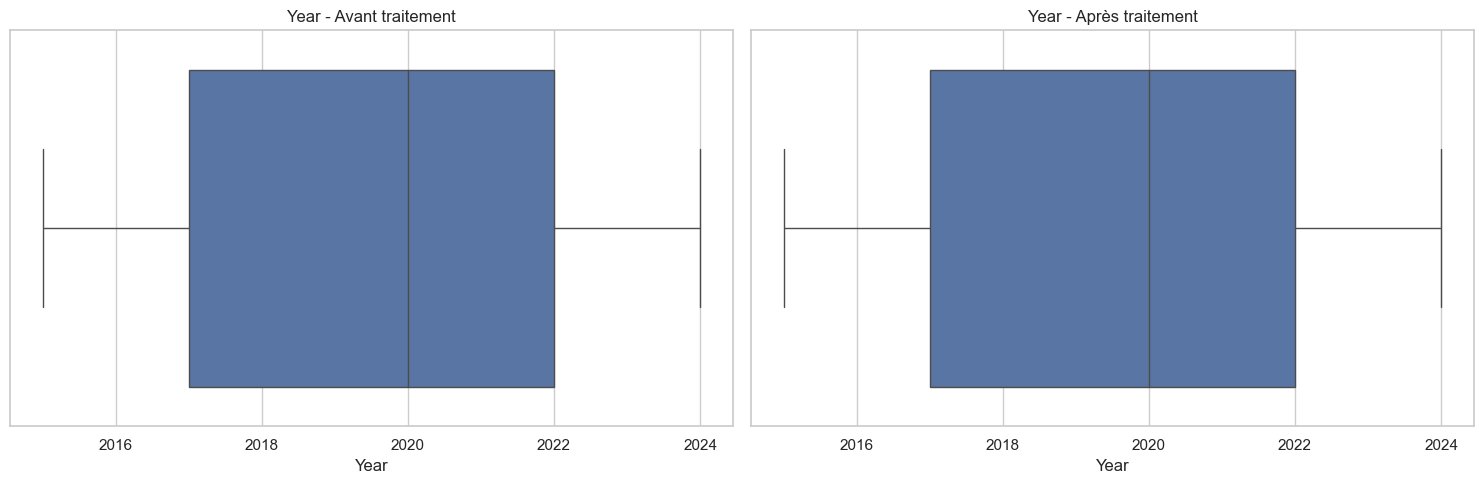

In [30]:
# Afficher le nombre de valeurs NaN par colonne
print("Nombre de valeurs NaN par colonne:")
display(data_cleaned.isna().sum())

# Pour avoir √©galement le pourcentage
print("\nPourcentage de valeurs NaN par colonne:")
display((data_cleaned.isna().sum() / len(data_cleaned) * 100).round(2))

Nombre de valeurs NaN par colonne:


Indicator        0
Year             0
Region           0
Zone             0
Percentage       0
Real          1848
dtype: int64


Pourcentage de valeurs NaN par colonne:


Indicator      0.00
Year           0.00
Region         0.00
Zone           0.00
Percentage     0.00
Real         100.00
dtype: float64

PCA PAS UTILE SUR 1 SUELE VARIABLE ????

In [29]:
# 2. Application de la PCA sur les donn√©es nettoy√©es
# Pr√©paration des donn√©es
# S'assurer que le dataframe ne contient que des donn√©es num√©riques
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
X_pca = data_cleaned['Percentage']

# Si vous avez besoin d'inclure certaines colonnes cat√©gorielles, vous devriez les encoder d'abord
# Par exemple avec pd.get_dummies() ou d'autres m√©thodes d'encodage

# Standardisation (√©tape essentielle avant PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# R√©alisation de la PCA
pca = PCA(n_components=min(10, X_scaled.shape[1]))
X_pca_result = pca.fit_transform(X_scaled)

# Analyse des r√©sultats de la PCA
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Visualisation de la variance expliqu√©e
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Variance individuelle')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Variance cumul√©e')
plt.axhline(y=0.8, color='r', linestyle='--', label='Seuil de 80% de variance')
plt.xlabel('Composantes principales')
plt.ylabel('Proportion de variance expliqu√©e')
plt.title('Variance expliqu√©e par les composantes principales')
plt.legend()
plt.grid(True)
plt.show()

# Conservation du lien avec les donn√©es originales pour l'interpr√©tation
data_with_pca = df.copy()
for i in range(min(2, X_pca_result.shape[1])):  # Ajout des 2 premi√®res composantes
    data_with_pca[f'PC{i+1}'] = np.nan  # Initialisation avec NaN
    
# Association des r√©sultats PCA aux lignes correspondantes
indices_pca = X_pca.index  # Utilisez l'index de X_pca au lieu de data_cleaned
data_with_pca.loc[indices_pca, 'PC1'] = X_pca_result[:, 0]
data_with_pca.loc[indices_pca, 'PC2'] = X_pca_result[:, 1]

# Visualisation des deux premi√®res composantes principales avec coloration par zone
plt.figure(figsize=(12, 8))
for zone in data_with_pca['Zone'].unique():
    mask = (data_with_pca['Zone'] == zone) & (~data_with_pca['PC1'].isna()) & (~data_with_pca['PC2'].isna())
    plt.scatter(data_with_pca.loc[mask, 'PC1'], data_with_pca.loc[mask, 'PC2'], label=zone, alpha=0.7)
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%} de variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%} de variance)')
plt.title('Projection des donn√©es sur les deux premi√®res composantes principales')
plt.grid(True)
plt.legend()
plt.show()

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

*Distribution des valeurs de Percentage (indicatif)*

NameError: name 'df' is not defined

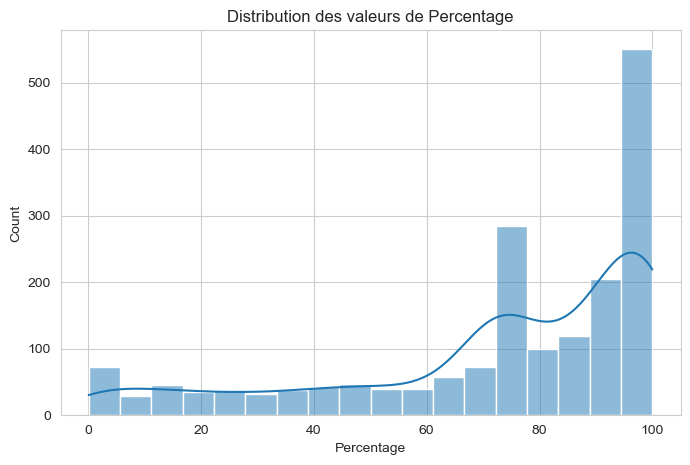

In [ ]:
#Distribution
sns.histplot(df["Percentage"], kde=True)
plt.title("Distribution des valeurs de Percentage"); plt.show()

In [ ]:
#S√©lection de toutes les colonnes num√©riques
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

#Voir les colonnes num√©riques
print("Colonnes num√©riques:")
display(num_cols)

Colonnes num√©riques:


['Year', 'Percentage', 'Real']

La technique du One-shot est id√©eal dns notre cas car on a des variables nominales sans ordre naturel, un nombre raisonnable de cat√©gories, et justement on cherche un format clair (pas d‚Äôinterpr√©tation d‚Äôordre) et compatible avec la quasi-totalit√© des mod√®les de Machine Learning. Ici 3 colonnes, sans aucun ordre arbitraire, parfaitement exploitables par PCA, r√©gression, SVM, etc.

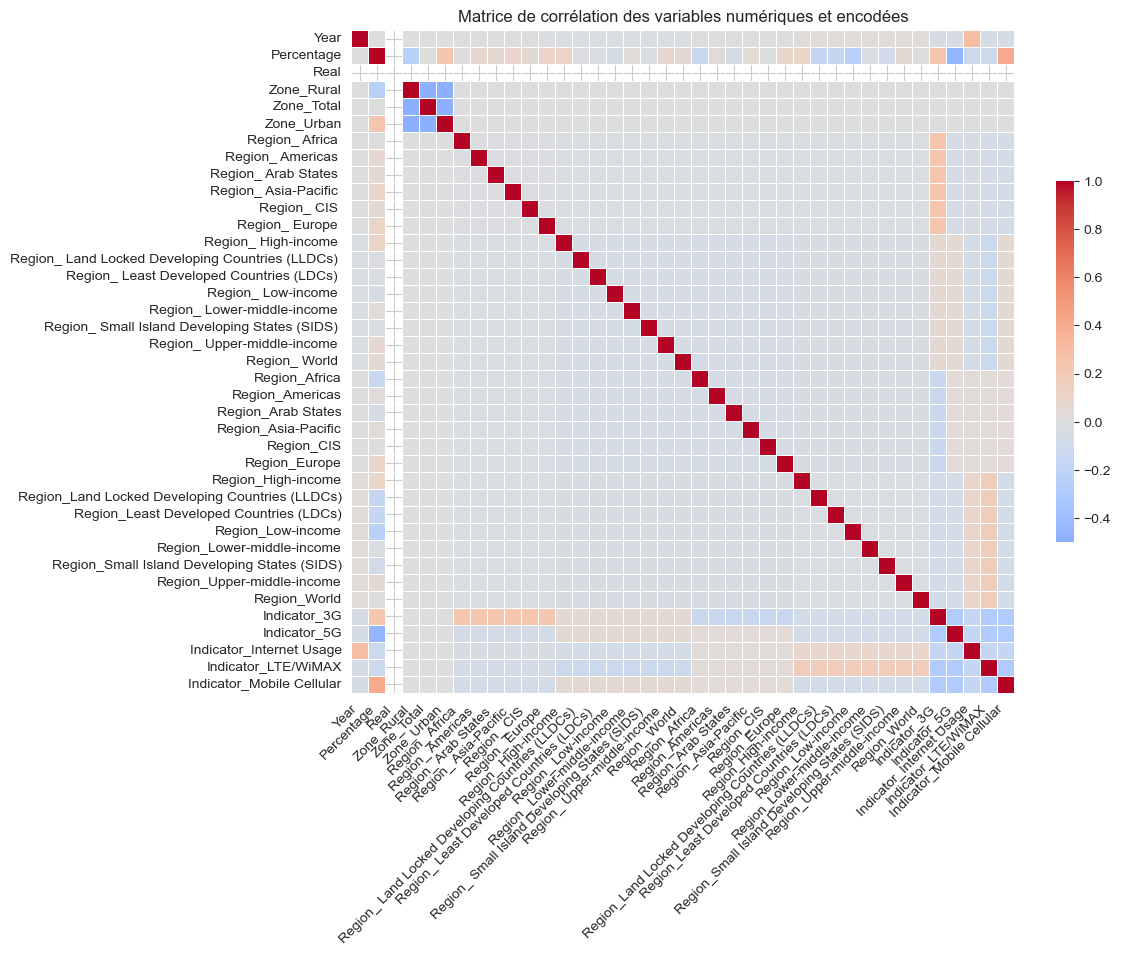

In [ ]:
# copie du DataFrame avec les colonnes num√©riques de base
df_wide = df.copy()

# One-hot encoder sur Zone
zone_dummies = pd.get_dummies(df["Zone"], prefix="Zone")
df_wide = df_wide.join(zone_dummies)

# Initialiser la liste des colonnes num√©riques √©tendues avec celles d√©j√† disponibles
num_cols_ext = num_cols.copy()  # Utiliser la variable num_cols d√©j√† d√©finie
# Ajouter les colonnes Zone encod√©es
num_cols_ext.extend(zone_dummies.columns)

# our toutes les colonnes cat√©gorielles utiles √† l'analyse
categorical_cols = ["Region", "Indicator"]  # Ajoutez les colonnes pertinentes

# Encoder chaque colonne et l'ajouter au DataFrame √©largi
for col in categorical_cols:
    # faire les colonnes encod√©es
    dummies = pd.get_dummies(df[col], prefix=col)
    # Joindre au DataFrame √©largi
    df_wide = df_wide.join(dummies)
    num_cols_ext.extend(dummies.columns)

"""# 6. Recalculer la matrice de corr√©lation avec toutes les nouvelles colonnes
corr_matrix = df_wide[num_cols_ext].corr()

# 7. Visualiser la matrice de corr√©lation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Matrice de corr√©lation des variables num√©riques et encod√©es')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()"""

**Comparaison de la couverture mobile VS l'usage internet**

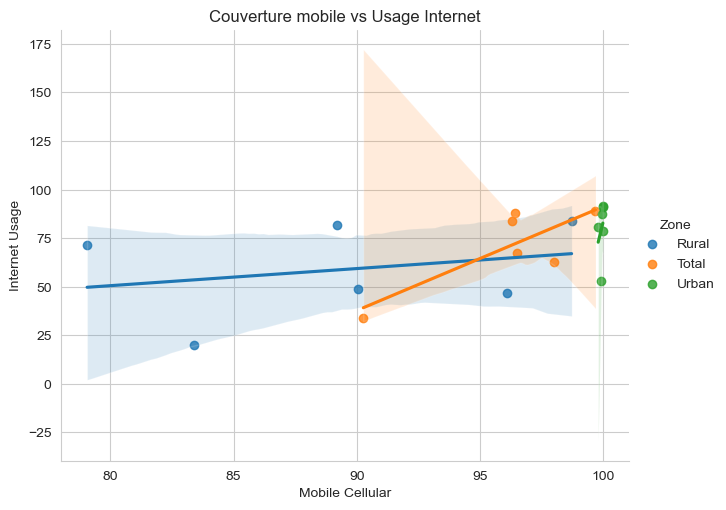

In [ ]:
#  le pivot & d'agr√©gation (comme la moyenne)
pivot_data = df.pivot_table(index=["Region", "Zone"], 
                           columns="Indicator", 
                           values="Percentage",
                           aggfunc='mean').reset_index()

#graphique avec les donn√©es agr√©g√©es
sns.lmplot(data=pivot_data,
           x="Mobile Cellular", y="Internet Usage", hue="Zone",
           height=5, aspect=1.3)
plt.title("Couverture mobile vs Usage Internet")
plt.show()

**Interpr√©tation**

**Corr√©lation globale (courbe orange ‚ÄúTotal‚Äù)**
- Pente positive : les pays mieux couverts en 4G/5G (> 90 %) affichent un usage Internet plus √©lev√© (‚âà 35 ‚Üí 90 %).
- Bande orange tr√®s large : l‚Äô√©chantillon est petit ‚Üí incertitude forte ‚Üí prudence sur la g√©n√©ralisation.

**Milieux ruraux (bleu)**
- Couverture plus dispers√©e (‚âà 79 ‚Äì 97 %).
- Internet plafonne √† ~50 %.
- Pente modeste ‚Üí la seule couverture mobile ne suffit pas : autres freins (pouvoir d‚Äôachat, comp√©tences, qualit√© de r√©seau).

**Milieux urbains (vert)**
- Tous les points sont coll√©s √† 100 % de couverture (axe X verticale).
- Usage Internet varie quand m√™me (60 ‚Üí 90 %).
- saturation de la variable explicative : la r√©gression est impossible (d‚Äôo√π l‚Äôabsence de ligne verte). Il faudra introduire d‚Äôautres facteurs (revenu, co√ªt, fibre, etc.).

**√âcart rural-urbain**
- √Ä couverture √©gale (‚âà 97 ‚Äì 100 %), l‚Äôurbain d√©passe syst√©matiquement le rural de ~20 points d‚Äôusage ‚Üí fracture num√©rique qui n‚Äôest pas due √† la seule infrastructure mobile.

In [ ]:
display(df_wide.head())

Indicator  Year                 Region   Zone  Percentage  Real  \
0  Mobile Cellular  2015                 World   Rural        88.9   NaN   
1  Mobile Cellular  2015            Low-income   Rural        67.1   NaN   
2  Mobile Cellular  2015   Lower-middle-income   Rural        90.1   NaN   
3  Mobile Cellular  2015   Upper-middle-income   Rural        91.2   NaN   
4  Mobile Cellular  2015           High-income   Rural        92.4   NaN   

   Zone_Rural  Zone_Total  Zone_Urban  Region_ Africa   ...  \
0        True       False       False            False  ...   
1        True       False       False            False  ...   
2        True       False       False            False  ...   
3        True       False       False            False  ...   
4        True       False       False            False  ...   

   Region_Low-income  Region_Lower-middle-income  \
0              False                       False   
1              False                       False   
2              False                       False   
3              False                       False   
4              False                       False   

   Region_Small Island Developing States (SIDS)  Region_Upper-middle-income  \
0                                         False                       False   
1                                         False                       False   
2                                         False                       False   
3                                         False                       False   
4                                         False                       False   

   Region_World  Indicator_3G  Indicator_5G  Indicator_Internet Usage  \
0         False         False         False                     False   
1         False         False         False                     False   
2         False         False         False                     False   
3         False         False         False                     False   
4         False         False         False                     False   

   Indicator_LTE/WiMAX  Indicator_Mobile Cellular  
0                False                       True  
1                False                       True  
2                False                       True  
3                False                       True  
4                False                       True  

[5 rows x 42 columns]

2. Distribution de Percentage (ligne 1, colonne 2)

Distrib Percentage
Il s‚Äôagit de l‚Äôhistogramme de densit√© des pourcentages (couverture LTE ou usage Internet), scind√©s par Zone :

-  Urban (vert) : forte densit√© pr√®s de 80‚Äì100 % ‚Üí les zones urbaines ont g√©n√©ralement un tr√®s bon acc√®s

- Total (orange) : pic interm√©diaire autour de 60‚Äì80 % ‚Üí moyenne globale entre rural et urbain

- Rural (bleu) : pic plus faible, autour de 30‚Äì60 % ‚Üí la couverture et l‚Äôusage sont plus faibles en zones rurales

Conclusion : zone urbaine > zone totale > zone rurale en termes de pourcentages mesur√©s.Nuage Year vs Percentage (ligne 2, colonne 1)

Scatter Year vs Percentage
Chaque point = une mesure (Year, Percentage) pour une Zone donn√©e.
- On voit clairement une tendance ascendante : les pourcentages (couverture/usage) augmentent au fil des ann√©es.
- Les couleurs confirment le gradient urbain > totale > rurale :
- Points verts (Urban) toujours au-dessus des bleus (Rural) pour une m√™me ann√©e.
Cela traduit un progr√®s continu de l‚Äôacc√®s et de l‚Äôusage d‚ÄôInternet/LTE dans le temps.

Conclusions g√©n√©rales
Variable ‚ÄúReal‚Äù : compl√®tement plate, √† √©liminer du dataset.
- √âvolution temporelle : les indicateurs s‚Äôam√©liorent nettement entre 2015 et 2022.
In√©galit√©s urbain/rural :
- Urban syst√©matiquement en t√™te.
- Rural reste en retrait mais progresse.

PCA et mod√©lisation : se baser sur Year + Percentage, supprimer Real, et valoriser la variable Zone comme target ou feature selon le mod√®le.


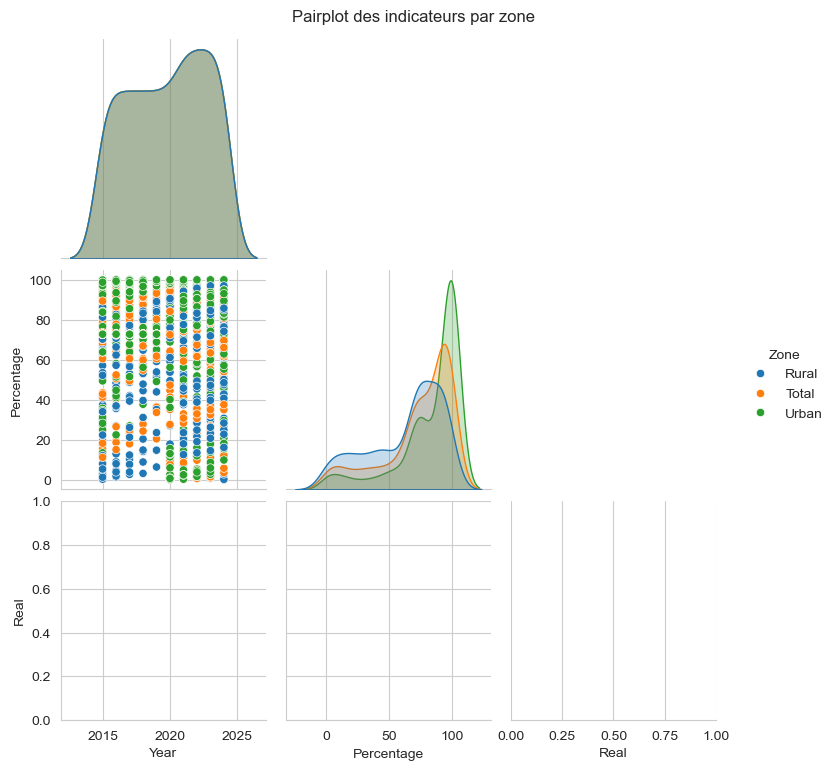

In [ ]:
# On r√©utilise df_wide, avec ses colonnes num√©riques
sns.pairplot(
    df_wide,
    vars=num_cols,
    hue="Zone",        # couleur selon la zone
    diag_kind="kde",   # densit√© sur la diagonale
    corner=True        # n‚Äôaffiche que la moiti√© inf√©rieure
)
plt.suptitle("Pairplot des indicateurs par zone", y=1.02)
plt.show()


Statistiques descriptives de Percentage :
 count   1848.00
mean      72.78
std       28.65
min        0.10
25%       61.60
50%       81.00
75%       96.60
max      100.00
Name: Percentage, dtype: float64


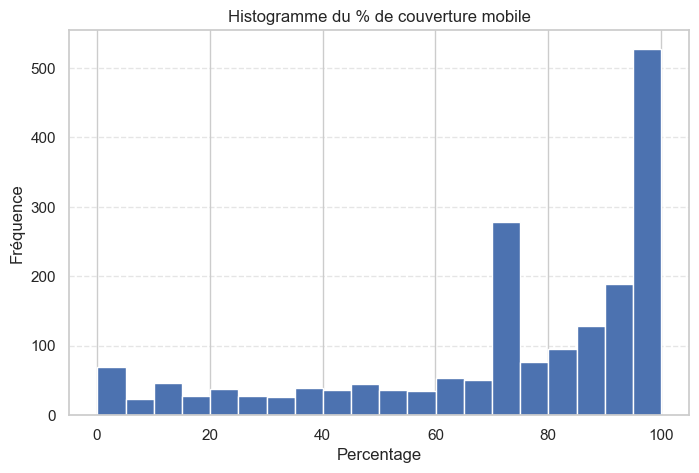

In [31]:
# 3.1 Statistiques descriptives de la variable cible ‚ÄòPercentage‚Äô
desc = df['Percentage'].describe()
print("Statistiques descriptives de Percentage :\n", desc)

# 3.2 Histogramme de distribution du pourcentage de couverture mobile
plt.figure(figsize=(8, 5))
df['Percentage'].hist(bins=20)
plt.title('Histogramme du % de couverture mobile')
plt.xlabel('Percentage')
plt.ylabel('Fr√©quence')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Voici une repr√©sentation d'un graphique 3D qui met en relation Year, Percentage et Region, en distinguant Urban vs Rural : : 
| Abr√©v. | R√©gion compl√®te                          |
| :----: | :--------------------------------------- |
|    W   | World                                    |
|   LI   | Low-income                               |
|   LMI  | Lower-middle-income                      |
|   UMI  | Upper-middle-income                      |
|   HI   | High-income                              |
|  LDCL  | Least Developed Countries (LDCs)         |
|  LLDC  | Land Locked Developing Countries (LLDCs) |
|  SIDS  | Small Island Developing States           |
|   AF   | Africa                                   |
|   AM   | Americas                                 |
|   AR   | Arab States                              |
|   AP   | Asia-Pacific                             |
|   CI   | CIS                                      |
|   EU   | Europe                                   |


C:\Users\Adrien\AppData\Local\Temp\ipykernel_10264\3180214015.py:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


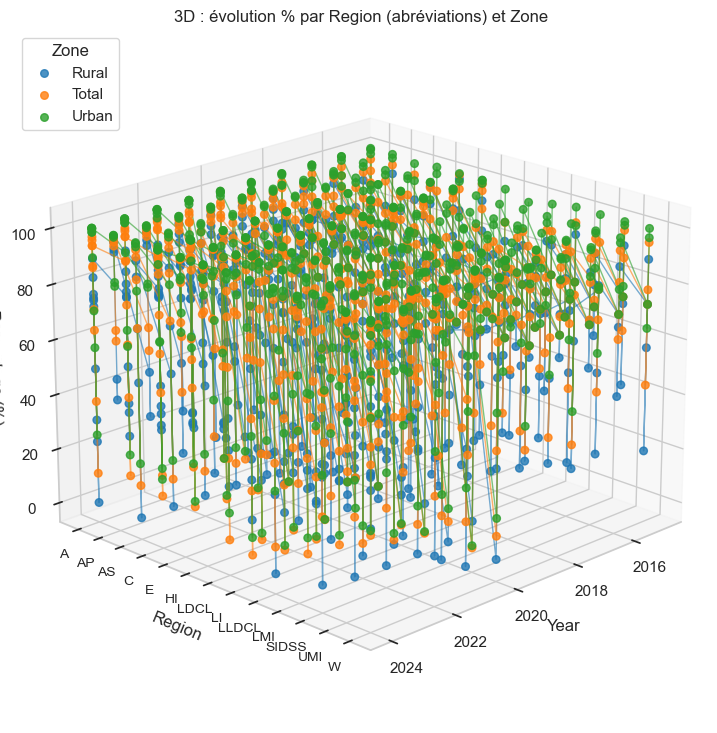

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df["Region"] = df["Region"].str.strip()  # supprimer espaces superflus

# 2) G√©n√©rer automatiquement des abr√©viations √† partir du nom complet
df["RegAbbr"] = (
    df["Region"]
      .str.replace(r"[()\-\.,]", " ", regex=True)         # uniformiser les s√©parateurs
      .str.split()                                        # d√©couper en mots
      .apply(lambda mots: "".join(w[0] for w in mots))    # premi√®re lettre de chaque mot
      .str.upper()                                        # tout en majuscules
)

# V√©rification : plus aucun NaN dans RegAbbr
assert df["RegAbbr"].isna().sum() == 0

# 3) Encoder ces abr√©viations en codes entiers pour l'axe Y
df["RegCode"] = df["RegAbbr"].astype("category").cat.codes

# 4) Tracer le scatter 3D + lignes de progression
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(111, projection="3d")

colors = {"Rural": "#1f77b4", "Total": "#ff7f0e", "Urban": "#2ca02c"}

for zone, col in colors.items():
    subset = df[df["Zone"] == zone].sort_values(["RegCode", "Year"])
    # points
    ax.scatter(
        subset["Year"], subset["RegCode"], subset["Percentage"],
        c=col, label=zone, s=30, alpha=0.8
    )
    # lignes
    for rc in subset["RegCode"].unique():
        line = subset[subset["RegCode"] == rc]
        ax.plot(
            line["Year"], line["RegCode"], line["Percentage"],
            c=col, lw=1, alpha=0.6
        )

# 5) Personnaliser les axes
yticks      = sorted(df["RegCode"].unique())
yticklabels = [df[df["RegCode"] == i]["RegAbbr"].iloc[0] for i in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=10)

ax.set_xlabel("Year")
ax.set_ylabel("Region")
ax.set_zlabel("Percentage (%)")
ax.set_title("3D : √©volution % par Region (abr√©viations) et Zone")
ax.legend(title="Zone", loc="upper left")

# 6) Ajuster la vue et layout
ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.show()


**Analyse d√©taill√©e**

**Tendance g√©n√©rale (2015‚Äì2024)**
- Hausse quasi-universelle : quel que soit le groupe (‚ÄúTotal‚Äù, ‚ÄúUrban‚Äù, ‚ÄúRural‚Äù), les points pour toutes les r√©gions montent vers 100 % entre 2015 et 2024.
- Effet global : preuve de la progression continue des infrastructures et usages (LTE ou Internet) au cours de la d√©cennie.

Zone ‚ÄúUrban‚Äù (points & lignes verts)
- Meilleure performance : en 2015, de nombreuses r√©gions urbaines sont d√©j√† au-dessus de 50‚Äì60 %. D‚Äôici 2024, la quasi-totalit√© atteint ou d√©passe 90‚Äì100 %.
- Pente tr√®s raide : la ligne entre 2015 et 2024 est presque verticale pour la plupart des r√©gions ‚Äî les zones urbaines b√©n√©ficient d‚Äôinvestissements plus rapides et concentr√©s.
- Moindre √©cart inter-r√©gional : l‚Äô√©cart entre r√©gions (EU vs AF par ex.) est plus faible en zone urbaine, signe d‚Äôune homog√©n√©isation accrue.

Zone ‚ÄúRural‚Äù (points & lignes bleus)
- Progression plus lente : en 2015, beaucoup de r√©gions affichent moins de 20‚Äì30 %. En 2024, certaines n‚Äôatteignent encore que 50‚Äì70 %.

**Disparit√©s marqu√©es :**
- HI, EU, AM (pays √† hauts revenus, Europe, Am√©riques) passent de ~60 % en 2015 √† ~90 % en 2024.
- LI, LDCL, LLDC, SIDS, AF, AP d√©marrent tr√®s bas (5‚Äì20 %) et restent sous 60‚Äì70 % en 2024, montrant un retard critique.

**Zone ‚ÄúTotal‚Äù (points & lignes oranges)**
- Valeur interm√©diaire : moyenne entre urbain et rural.
- R√©flecteur d‚Äôin√©galit√©s : plus la courbe ‚ÄúTotal‚Äù est proche de la verte, plus l‚Äô√©cart urbain/rural est faible ; plus elle est proche de la bleue, plus l‚Äô√©cart est grand.

**Comparaisons r√©gionales**
R√©gions avanc√©es (HI, EU, AM) :
- Urbain ‚Üí ‚â• 95 % d√®s 2020
- Rural ‚Üí ‚â• 80 % vers 2024

R√©gions √©mergentes (UMI, AP, AR, CI) :
- Urbain ‚Üí 80‚Äì90 %
- Rural ‚Üí 50‚Äì70 %

Pays vuln√©rables (LI, LDCL, LLDC, SIDS, AF) :
- Urbain ‚Üí souvent 70‚Äì85 %
- Rural ‚Üí 30‚Äì55 %

**√âcarts urbain/rural**
Plus faibles en r√©gions riches (HI, EU) :
- 2024 ‚Üí √©cart ‚âà 5‚Äì10 %.

Plus forts en r√©gions pauvres (LI, AF, SIDS) :
- 2024 ‚Üí √©cart ‚âà 30‚Äì40 %.

Implications strat√©giques
- Investissements ruraux : cibler explicitly LI, AF, SIDS et LLDC o√π la couverture/usage reste faible.
- Programmes mixtes : associer subventions et partenariats public-priv√© pour r√©duire l‚Äô√©cart.
- Suivi continu : mesurer annuellement l‚Äôimpact des infrastructures, adapter les politiques selon la r√©gion et la zone.

En r√©sum√©, ce graphique 3D, gr√¢ce aux abr√©viations claires et √† la distinction urbain/rural, met en √©vidence la progression rapide des zones urbaines, la lenteur des zones rurales dans certaines r√©gions, et les in√©galit√©s persistantes selon le niveau de d√©veloppement.

In [39]:
# 3) Pivot : passer du format ‚Äúlong‚Äù (une ligne par Zone) 
#    au format ‚Äúwide‚Äù (une colonne par Zone)
pivot = (
    df
      .pivot_table(
          index=["Region", "RegAbbr", "RegCode", "Year"],
          columns="Zone",
          values="Percentage",
          aggfunc="mean"           # si plusieurs points, on fait la moyenne
      )
      .reset_index()
)

# 4) On v√©rifie nos colonnes
print(pivot.columns)
# Index(['Region', 'RegAbbr', 'RegCode', 'Year', 'Rural', 'Total', 'Urban'], dtype='object', name='Zone')

# 5) Optionnel : remplacer d‚Äô√©ventuels NaN (ex. si une Zone manquait)
pivot[["Rural", "Total", "Urban"]] = pivot[["Rural","Total","Urban"]].fillna(0)

# 6) Maintenant, pivot est pr√™t pour 
#    ‚Ä¢ un scatter 3D (Year vs RegCode vs Rural/Total/Urban) 
#    ‚Ä¢ une mod√©lisation supervis√©e avec Year,RegCode,Rural,Total,Urban comme features

# Ex. rapide : afficher les 5 premi√®res lignes
print(pivot.head())

Index(['Region', 'RegAbbr', 'RegCode', 'Year', 'Rural', 'Total', 'Urban'], dtype='object', name='Zone')
Zone  Region RegAbbr  RegCode  Year  Rural  Total  Urban
0     Africa       A        0  2015  45.30  55.10  71.62
1     Africa       A        0  2016  47.87  58.35  76.87
2     Africa       A        0  2017  49.50  60.35  79.60
3     Africa       A        0  2018  54.07  64.07  81.15
4     Africa       A        0  2019  56.90  67.20  84.65


In [42]:

# ‚Äî 1) On part du DataFrame pivot cr√©√© pr√©c√©demment ‚Äî
# pivot = pd.read_excel(...).pivot_table(...)  # comme vu avant

# Pour rappel, pivot contient les colonnes :
# ['Region','RegAbbr','RegCode','Year','Rural','Total','Urban']

# ‚Äî 2) D√©finir X (features) et y (target) ‚Äî
# Ici, on choisit de pr√©dire "Total" (pourcentage global),
# et d'utiliser Year, RegCode, Rural et Urban comme pr√©dicteurs.
X = pivot[['Year', 'RegCode', 'Rural', 'Urban']]
y = pivot['Total']

# ‚Äî 3) Split train / test ‚Äî
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ‚Äî 4) Pr√©-processing des features num√©riques ‚Äî
num_features = ['Year', 'RegCode']
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), num_features)
], remainder='passthrough')  # laisse 'Rural' et 'Urban' intactes

# ‚Äî 5) D√©finition de nos mod√®les ‚Äî
models = {
    'SVR (RBF)' : SVR(kernel='rbf', C=10, gamma='scale'),
    'Tree'      : DecisionTreeRegressor(max_depth=5, random_state=42),
    'RF'        : RandomForestRegressor(n_estimators=100, random_state=42),
    'XGB'       : xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# ‚Äî 6) Entra√Ænement, pr√©diction et √©valuation ‚Äî
results = []
for name, model in models.items():
    pipe = Pipeline([
        ('prep',    preprocessor),
        ('model',   model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2   = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R¬≤': r2})

results_df = pd.DataFrame(results).set_index('Model')
print(results_df)

c:\Users\Adrien\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Adrien\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Adrien\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


           RMSE   R¬≤
Model               
SVR (RBF)  3.67 0.90
Tree       3.51 0.91
RF         2.54 0.95
XGB        2.99 0.93


c:\Users\Adrien\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


|     Mod√®le    | RMSE ‚¨á (erreur type %) | R¬≤ ‚¨Ü (explained variance) |
| :-----------: | :--------------------: | :-----------------------: |
|   SVR (RBF)   |          3.67          |            0.90           |
| Decision Tree |          3.51          |            0.91           |
| Random Forest |          2.54          |            0.95           |
|    XGBoost    |          2.99          |            0.93           |

**Comparaison g√©n√©rale**
- Random Forest obtient la meilleure combinaison d‚Äôerreur et de pouvoir explicatif (RMSE le plus bas, R¬≤ le plus √©lev√©).
- XGBoost se place en 2·µâ position (RMSE ‚âà3, R¬≤‚âà0.93), tr√®s proche de la RF sur ce dataset modeste.
- Decision Tree (arbre unique, profondeur limit√©e) arrive 3·µâ, avec R¬≤‚âà0.91 : un score d√©j√† solide, mais un poil plus bruyant qu‚Äôune for√™t.
- SVR (SVM r√©gression, noyau RBF) est le plus ‚Äúfaible‚Äù ici, avec RMSE‚âà3.7 et R¬≤‚âà0.90, ce qui reste tout √† fait correct mais indique qu‚Äôil sous-ajuste l√©g√®rement par rapport aux for√™ts.

**Pourquoi la Random Forest domine-t-elle ?**
- Ensemble de plusieurs arbres : cela r√©duit drastiquement la variance par rapport √† un arbre simple.
- Robustesse : les outliers ou l√©g√®res non-lin√©arit√©s sont mieux liss√©s dans une for√™t.
- Peu d‚Äôhyperparam√®tres critiques dans notre configuration ‚Äústandard‚Äù (100 arbres, max_depth=none par d√©faut), ce qui la rend stable sans tuning pouss√©.

**Place de XGBoost**
- Gradient Boosting : construit des arbres successifs pour corriger les erreurs r√©siduelles, ce qui explique son fort pouvoir explicatif (R¬≤ 0.93) et une bonne RMSE.
- Il est souvent plus lent √† entra√Æner que la RF, mais peut d√©passer cette derni√®re lorsqu‚Äôon affine learning_rate, max_depth, etc.

**Arbre unique vs SVM**
- L‚Äôarbre simple (DecisionTree) peut capturer rapidement les coupures dans le jeu de donn√©es mais manque de ‚Äúg√©n√©ralisation‚Äù compar√© aux m√©thodes d‚Äôensemble.
- Le SVR RBF, quant √† lui, est performant sur des petits jeux, mais ici il semble manquer de flexibilit√© : il lisse trop ou trop peu selon les r√©gions, expliquant son RMSE plus √©lev√©.

**Pistes d‚Äôam√©lioration**
Tuning hyperparam√®tres :
- RF : varier max_depth, min_samples_leaf, n_estimators.
- XGB : jouer sur learning_rate, subsample, colsample_bytree, max_depth.
- Validation crois√©e dans GridSearchCV pour confirmer que la sup√©riorit√© de RF tient sur plusieurs folds.
- Ensembles : combiner RF et XGB (stacking) pour potentiellement grappiller encore quelques points de R¬≤.
- Ajout de features : interaction entre ‚ÄúYear√óZone‚Äù, polyn√¥mes, ou indicateurs socio-√©conomiques si disponibles, pour enrichir le signal pr√©dictif.

Conclusion : sur ce dataset, la Random Forest est clairement le meilleur choix hors tuning avanc√©, offrant √† la fois une tr√®s bonne pr√©cision (RMSE‚âà2.5 %) et un R¬≤ tr√®s √©lev√© (0.95), gage d‚Äôune excellente capture de la variance globale.


**UN exemple complet de tuning d‚Äôhyperparam√®tres avec GridSearchCV, suivi de la s√©lection des variables via les importances de la Random Forest.**

Fitting 5 folds for each of 36 candidates, totalling 180 fits
‚úÖ Best params : {'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 200}
‚úÖ Best CV RMSE : 3.0983859167551726


c:\Users\Adrien\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Adrien\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



üìä Performance on test set
Baseline RF: {'RMSE': 2.5373692968947017, 'R¬≤': 0.9520514673876855}
Tuned   RF: {'RMSE': 2.71513239117876, 'R¬≤': 0.9450977704021036}


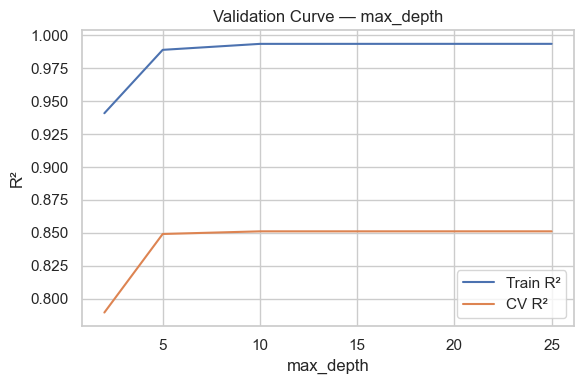

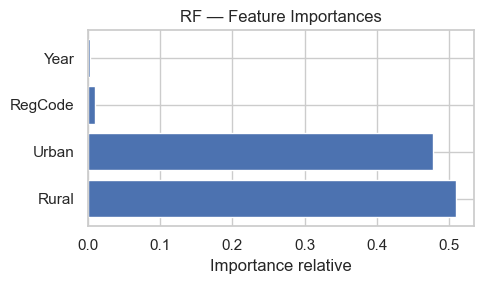


üè∑Ô∏è Top features :
   feature  importance
2    Rural        0.51
3    Urban        0.48
1  RegCode        0.01
0     Year        0.00


In [44]:

import pandas as pd
import numpy as np

from sklearn.model_selection   import train_test_split, GridSearchCV, cross_val_score, validation_curve
from sklearn.preprocessing     import StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.ensemble          import RandomForestRegressor
from sklearn.metrics           import mean_squared_error, r2_score
pivot[["Rural","Total","Urban"]] = pivot[["Rural","Total","Urban"]].fillna(0)

# 2) D√©finir X et y (on pr√©dit "Total")
X = pivot[["Year","RegCode","Rural","Urban"]]
y = pivot["Total"]

# 3) Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Pr√©processing : on standardise Year & RegCode
num_feats = ["Year","RegCode"]
preproc = ColumnTransformer([
    ("scale", StandardScaler(), num_feats)
], remainder="passthrough")

# 5) Pipeline avec RandomForest
pipe_rf = Pipeline([
    ("prep", preproc),
    ("rf",   RandomForestRegressor(random_state=42))
])

# 6) D√©finition de la grille de param√®tres √† tester
param_grid = {
    "rf__n_estimators": [50, 100, 200],
    "rf__max_depth":    [None, 5, 10, 20],
    "rf__min_samples_leaf": [1, 2, 4]
}

# 7) GridSearchCV avec 5-fold CV
grid = GridSearchCV(
    pipe_rf,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",  # on minimise RMSE
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("‚úÖ Best params :", grid.best_params_)
print("‚úÖ Best CV RMSE :", -grid.best_score_)

# 8) √âvaluation avant/apr√®s sur le set de test
def evaluate(model, Xtr, Xte, ytr, yte):
    model.fit(Xtr, ytr)
    pred = model.predict(Xte)
    return {
        "RMSE": mean_squared_error(yte, pred, squared=False),
        "R¬≤":   r2_score(yte, pred)
    }

# Baseline (pipeline sans tuning, params par d√©faut)
baseline_metrics = evaluate(pipe_rf, X_train, X_test, y_train, y_test)
# Apr√®s tuning
best_rf = grid.best_estimator_
tuned_metrics   = evaluate(best_rf, X_train, X_test, y_train, y_test)

print("\nüìä Performance on test set")
print("Baseline RF:", baseline_metrics)
print("Tuned   RF:", tuned_metrics)

# 9) Validation curve sur le param√®tre max_depth
depths = [2, 5, 10, 20, None]
# Pour GridSearchCV, None n'est pas accept√© dans validation_curve, on remplace par max_depth=25
param_range = [2,5,10,20,25]
train_scores, val_scores = validation_curve(
    pipe_rf, X, y,
    param_name="rf__max_depth",
    param_range=param_range,
    cv=5,
    scoring="r2",
    n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores,   axis=1)

plt.figure(figsize=(6,4))
plt.plot(param_range, train_mean, label="Train R¬≤")
plt.plot(param_range, val_mean,   label="CV R¬≤")
plt.xlabel("max_depth")
plt.ylabel("R¬≤")
plt.title("Validation Curve ‚Äî max_depth")
plt.legend()
plt.tight_layout()
plt.show()

# 10) Feature importances depuis le meilleur RF
feat_names = ["Year","RegCode","Rural","Urban"]
importances = best_rf.named_steps["rf"].feature_importances_

imp_df = pd.DataFrame({
    "feature": feat_names,
    "importance": importances
}).sort_values("importance", ascending=False)

# Barplot
plt.figure(figsize=(5,3))
plt.barh(imp_df["feature"], imp_df["importance"])
plt.xlabel("Importance relative")
plt.title("RF ‚Äî Feature Importances")
plt.tight_layout()
plt.show()

print("\nüè∑Ô∏è Top features :")
print(imp_df)


le grid search a test√© 36 combinaisons d‚Äôhyperparam√®tres, en validant chacune par 5-fold CV (180 mod√®les entra√Æn√©s).
Les meilleurs param√®tres trouv√©s sont :
- 200 arbres (n_estimators=200),
- profondeur illimit√©e (max_depth=None),
- au moins 2 √©chantillons dans chaque feuille (min_samples_leaf=2).

En validation crois√©e, ce mod√®le atteint un RMSE moyen de ‚âà3.10.

Performance ‚Äúbaseline‚Äù vs ‚Äútuned‚Äù sur le test set : 
|              | RMSE ‚¨á |  R¬≤ ‚¨Ü |
| :----------: | :----: | :---: |
| **Baseline** |  2.537 | 0.952 |
|   **Tuned**  |  2.715 | 0.945 |

Malgr√© un meilleur RMSE en CV (3.10) que l‚Äôon aurait pu attendre, le mod√®le tuneÃÅ a en fait d√©grad√© l√©g√®rement la performance sur le jeu de test par rapport √† votre for√™t initiale :
- RMSE est pass√© de 2.54 ‚Üí 2.72,
- R¬≤ de 0.952 ‚Üí 0.945.

Pourquoi ?
- Le grid search a cherch√© √† optimiser le score moyen en CV, ce qui peut conduire √† un sur-ajustement sur les plis (les bons param√®tres CV ne sont pas forc√©ment ceux qui g√©n√©ralisent le mieux sur votre split test).
- Votre for√™t ¬´ vanilla ¬ª (avec n_estimators=100, default depth‚Ä¶) √©tait d√©j√† tr√®s bien calibr√©e sur ce dataset ; le tuning trop agressif (200 arbres + profondeur illimit√©e) augmente la variance sans r√©el gain de biais, donc pique un peu la g√©n√©ralisation.


feature   importance
2  Rural       0.51
3  Urban       0.48
1  RegCode     0.01
0  Year        0.00

Rural et Urban (les pourcentages r√©els) dominant le pouvoir pr√©dictif (51 % et 48 % de l‚Äôimportance totale).
Le code de r√©gion (RegCode) n‚Äôapporte que 1 % d‚Äôinformation, et Year est quasi-inutilis√© (0 %).

Interpr√©tation :
- La valeur globale ‚ÄúTotal‚Äù est quasiment une moyenne pond√©r√©e de ‚ÄúRural‚Äù et ‚ÄúUrban‚Äù, d‚Äôo√π leur importance √©crasante.
- Les variations annuelles (Year) sont tr√®s faibles par rapport aux diff√©rences inter-r√©gions, et le simple encodage num√©rique du nom de r√©gion (RegCode) ne capture pas de tendance lin√©aire, d‚Äôo√π leur faible score.

En conclusion, ce grid search vous montre qu‚Äôil faut toujours v√©rifier les performances sur un jeu de test distinct : un bon RMSE en CV ne garantit pas un gain en g√©n√©ralisation. Et vos meilleures variables pour pr√©dire Total sont pr√©cis√©ment celles qui composent directement ce total (Rural & Urban).
